In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, recall_score, ConfusionMatrixDisplay, precision_score, jaccard_score, make_scorer
import itertools
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import GradientBoostingClassifier

# Regresao para BBbar

In [51]:
dados = pd.read_csv("NovoBBar_Tagging.csv")

In [52]:
dados.describe()

,PtJet,nConstituent,Angularidade,SigmaKT,MaxRho,N_Vertices_S,FracLeadPt,Label
count,96326.000000,96326.000000,96326.000000,96326.000000,96326.000000,96326.000000,96326.000000,96326.000000
mean,7.347758,7.753099,0.215942,0.886480,0.082341,0.516070,0.389709,0.038920
std,3.933972,2.954425,0.048578,0.499730,0.209632,1.402362,0.145000,0.193405
min,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.092754,0.000000
25%,5.541882,6.000000,0.187058,0.583635,0.000000,0.000000,0.285988,0.000000
50%,6.340690,7.000000,0.215760,0.776788,0.000000,0.000000,0.362903,0.000000
75%,7.822388,9.000000,0.244357,1.048900,0.000000,0.000000,0.464421,0.000000
max,200.413000,38.000000,0.642087,17.032400,0.999967,19.000000,1.000000,1.000000


In [53]:
X = np.asarray(dados[["PtJet","nConstituent","SigmaKT","N_Vertices_S","FracLeadPt"]])
Y = np.asarray(dados[["Label"]])

In [54]:
label_counts = dados['Label'].value_counts() 

print(f"Quantidade de rótulo 0: {label_counts[0]}")
print(f"Quantidade de rótulo 1: {label_counts[1]}")

Quantidade de rótulo 0: 92577
Quantidade de rótulo 1: 3749


In [55]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=1)
#Y_train = Y_train.ravel()
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (77060, 5) (77060, 1)
Test set: (19266, 5) (19266, 1)


In [56]:
unique, counts = np.unique(Y_test, return_counts=True)
for u, c in zip(unique, counts):
    print(f"Quantidade de rótulo {u}: {c}")

Quantidade de rótulo 0: 18515
Quantidade de rótulo 1: 751


In [57]:
LR = LogisticRegression(C=0.01, solver='saga',max_iter=10000, random_state=10).fit(X_train ,Y_train.ravel())
LR

,penalty,'l2'
,dual,False
,tol,0.0001
,C,0.01
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,10
,solver,'saga'
,max_iter,10000
,multi_class,'deprecated'


Para os dados de treino
Eficiência = 0.09940

Pureza = 0.45083


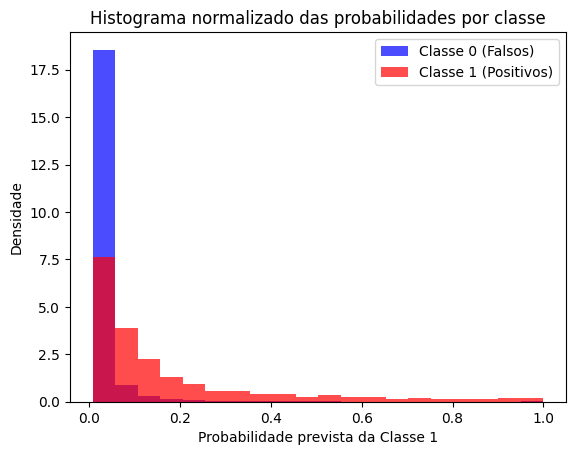

In [58]:
previsao = LR.predict(X_train)
eficiencia = recall_score(Y_train,previsao,pos_label=1)
pureza = precision_score(Y_train, previsao, pos_label=1)
print ("Para os dados de treino")
print(f"Eficiência = {eficiencia:.5f}")
print ()
print(f"Pureza = {pureza:.5f}")

import matplotlib.pyplot as plt

# Probabilidades previstas da classe 1
y_proba = LR.predict_proba(X_train)[:, 1]

# Plota histogramas normalizados (densidade)
plt.hist(y_proba[Y_train.ravel() == 0], bins=20, alpha=0.7, color="blue", label="Classe 0 (Falsos)", density=True)

plt.hist(y_proba[Y_train.ravel() == 1], bins=20, alpha=0.7, color="red", label="Classe 1 (Positivos)", density=True)

plt.xlabel("Probabilidade prevista da Classe 1")
plt.ylabel("Densidade")
plt.title("Histograma normalizado das probabilidades por classe")
plt.legend()
plt.show()

Para os dados de treino
Eficiência = 0.08921

Pureza = 0.41875


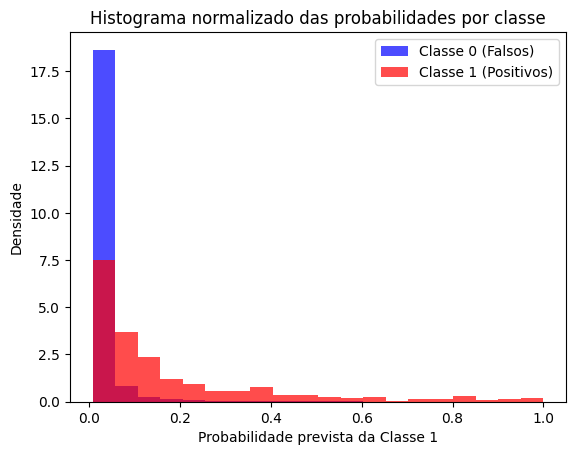

In [59]:
previsao = LR.predict(X_test)
eficiencia = recall_score(Y_test,previsao,pos_label=1)
pureza = precision_score(Y_test, previsao, pos_label=1)
print ("Para os dados de treino")
print(f"Eficiência = {eficiencia:.5f}")
print ()
print(f"Pureza = {pureza:.5f}")

import matplotlib.pyplot as plt

# Probabilidades previstas da classe 1
y_proba = LR.predict_proba(X_test)[:, 1]

# Plota histogramas normalizados (densidade)
plt.hist(y_proba[Y_test.ravel() == 0], bins=20, alpha=0.7, color="blue", label="Classe 0 (Falsos)", density=True)

plt.hist(y_proba[Y_test.ravel() == 1], bins=20, alpha=0.7, color="red", label="Classe 1 (Positivos)", density=True)

plt.xlabel("Probabilidade prevista da Classe 1")
plt.ylabel("Densidade")
plt.title("Histograma normalizado das probabilidades por classe")
plt.legend()
plt.show()

Threshold 0.00 -> Eficiência: 1.00000, Pureza: 0.03898
Threshold 0.02 -> Eficiência: 0.94008, Pureza: 0.06217
Threshold 0.04 -> Eficiência: 0.76032, Pureza: 0.17403
Threshold 0.06 -> Eficiência: 0.63915, Pureza: 0.24590
Threshold 0.07 -> Eficiência: 0.55792, Pureza: 0.29219
Threshold 0.09 -> Eficiência: 0.49268, Pureza: 0.32202
Threshold 0.11 -> Eficiência: 0.43409, Pureza: 0.34904
Threshold 0.13 -> Eficiência: 0.38881, Pureza: 0.36776
Threshold 0.15 -> Eficiência: 0.34088, Pureza: 0.37048
Threshold 0.17 -> Eficiência: 0.31425, Pureza: 0.38625
Threshold 0.18 -> Eficiência: 0.28628, Pureza: 0.39305
Threshold 0.20 -> Eficiência: 0.26897, Pureza: 0.40974
Threshold 0.22 -> Eficiência: 0.25300, Pureza: 0.42697
Threshold 0.24 -> Eficiência: 0.24101, Pureza: 0.43720
Threshold 0.26 -> Eficiência: 0.21971, Pureza: 0.43307
Threshold 0.28 -> Eficiência: 0.20772, Pureza: 0.45087
Threshold 0.29 -> Eficiência: 0.19441, Pureza: 0.45201
Threshold 0.31 -> Eficiência: 0.18908, Pureza: 0.45955
Threshold 

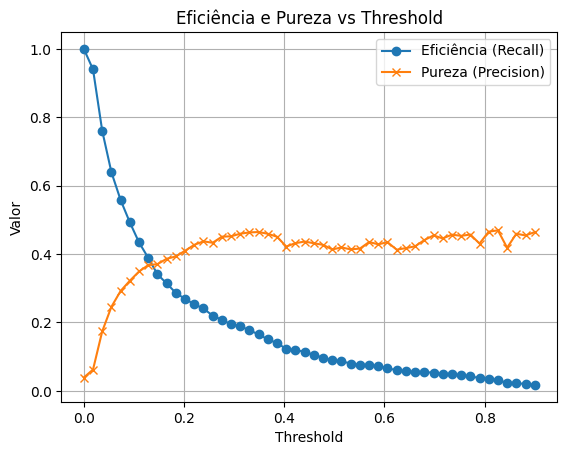

In [60]:
y_proba = LR.predict_proba(X_test)[:, 1]

# Testando thresholds de 0 a 1
thresholds = np.linspace(0, 0.9, 50)  
eficiencia_list = []
pureza_list = []

for t in thresholds:
    y_pred_custom = (y_proba >= t).astype(int)  
    eficiencia_list.append(recall_score(Y_test, y_pred_custom, pos_label=1))
    pureza_list.append(precision_score(Y_test, y_pred_custom, pos_label=1))


for t, r, p in zip(thresholds, eficiencia_list, pureza_list):
    print(f"Threshold {t:.2f} -> Eficiência: {r:.5f}, Pureza: {p:.5f}")

# Plotar curvas
plt.plot(thresholds, eficiencia_list, label="Eficiência (Recall)", marker='o')
plt.plot(thresholds, pureza_list, label="Pureza (Precision)", marker='x')
plt.xlabel("Threshold")
plt.ylabel("Valor")
plt.title("Eficiência e Pureza vs Threshold")
plt.legend()
plt.grid(True)
plt.show()

In [64]:
Y_probas = LR.predict_proba(X_test)
Y_probas

array([[0.98, 0.02],
       [0.94, 0.06],
       [0.98, 0.02],
       ...,
       [0.98, 0.02],
       [0.98, 0.02],
       [0.98, 0.02]], shape=(19266, 2))

Confusion matrix, without normalization
[[  291  2744]
 [  376 73649]]


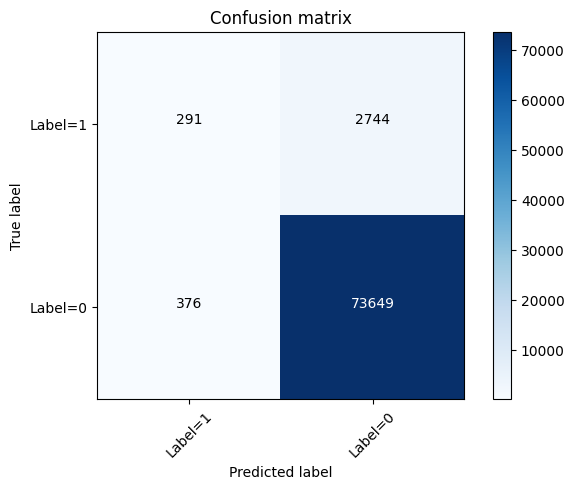

In [41]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

previsao = LR.predict(X_train)    
cnf_matrix = confusion_matrix(Y_train, previsao, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Label=1','Label=0'],normalize= False,  title='Confusion matrix')

In [83]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

def plot_ROC(falsePositiveRate, truePositiveRate, areaUnderCurve):
    fig = plt.figure()
    fig.set_size_inches(15, 5)
    rocCurve = fig.add_subplot(1, 2, 1)

    # curva ROC
    rocCurve.plot(falsePositiveRate, truePositiveRate, color='darkgreen',
                  lw=2, label='ROC curve (area = %0.2f)' % areaUnderCurve)
    
    # linha aleatória
    rocCurve.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    
    # grade, limites e ticks
    rocCurve.grid()
    plt.xlim([0.0, 1.0])
    rocCurve.set_xticks(np.arange(0, 1.1, 0.1))
    plt.ylim([0.0, 1.05])
    rocCurve.set_yticks(np.arange(0, 1.05, 0.1))
    
    # rótulos
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    rocCurve.legend(loc="lower right")
    
    for i in range(0, len(thresholds), max(1, len(thresholds)//10)):
        plt.annotate(f"{thresholds[i]:.2f}",
                     (fpr[i], tpr[i]),
                     textcoords="offset points", xytext=(10, -5),
                     fontsize=8, color="red",
                     arrowprops=dict(arrowstyle="->", lw=0.5))
    
    return plt


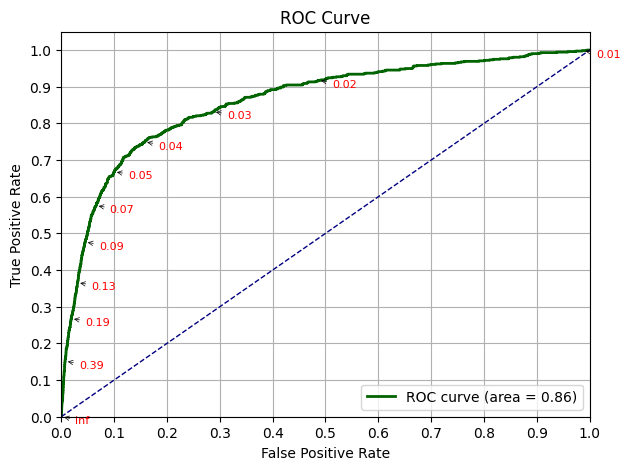

In [84]:
# calcular fpr, tpr e auc
fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_probas[:, 1])
auc = metrics.auc(fpr, tpr)

# chamar a função e mostrar o gráfico
plot_ROC(fpr, tpr, auc)
plt.show()

In [85]:
from sklearn.metrics import confusion_matrix, classification_report

# probabilidade da classe positiva
Y_probas = LR.predict_proba(X_train)[:, 1]

# escolher threshold
threshold = 0.9
previsao_custom = (Y_probas >= threshold).astype(int)
#FP/(FP + TN)
# avaliar
print("Threshold escolhido:", threshold)
print("Matriz de confusão:")
print(confusion_matrix(Y_train, previsao_custom))
print("\nRelatório de classificação:")
print(classification_report(Y_train, previsao_custom))

Threshold escolhido: 0.9
Matriz de confusão:
[[73937    88]
 [ 2971    64]]

Relatório de classificação:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     74025
           1       0.42      0.02      0.04      3035

    accuracy                           0.96     77060
   macro avg       0.69      0.51      0.51     77060
weighted avg       0.94      0.96      0.94     77060



## Determinacao dos mehlores parametros bbbar

In [25]:

logreg = LogisticRegression(random_state=42)


pureza = make_scorer(precision_score, pos_label=1, zero_division=0)


cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],           # regularização inversa
    'penalty': ['l1', 'l2'],                # tipo de regularização
    'solver': ['liblinear', 'saga'],        # algoritmos que suportam L1/L2
    'max_iter': [100, 200, 500]             # número máximo de iterações
}

# --- GridSearchCV ---
gs = GridSearchCV(
    estimator=logreg,
    param_grid=param_grid,
    scoring=pureza,
    cv=cv,
    n_jobs=-1
)

# --- Treinar ---
gs.fit(X_train, Y_train.ravel())

# --- Resultados ---
print("Melhores parâmetros:", gs.best_params_)
print("Melhor pureza (precision classe 1):", gs.best_score_)

/home/vinicius/Ambientes/Heavy_Jets_Machine/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vinicius/Ambientes/Heavy_Jets_Machine/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vinicius/Ambientes/Heavy_Jets_Machine/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vinicius/Ambientes/Heavy_Jets_Machine/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vinicius/Ambientes/Heavy_Jets_Machine/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the 

Melhores parâmetros: {'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}
Melhor pureza (precision classe 1): 0.4724853271728272


/home/vinicius/Ambientes/Heavy_Jets_Machine/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


# Regresao para CCBar

In [113]:
dados1 = pd.read_csv("NovoCCBar_Tagging.csv")
dados1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6163 entries, 0 to 6162
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PtJet         6163 non-null   float64
 1   nConstituent  6163 non-null   int64  
 2   Angularidade  6163 non-null   float64
 3   SigmaKT       6163 non-null   float64
 4   MaxRho        6163 non-null   float64
 5   N_Vertices_S  6163 non-null   int64  
 6   FracLeadPt    6163 non-null   float64
 7   Label         6163 non-null   int64  
dtypes: float64(5), int64(3)
memory usage: 385.3 KB


In [114]:
#dados1["ln_SigmaKT"] = np.log(dados1["SigmaKT"] + 1e-12) # coloca o desvio sigmakt em ln os resultados com ele foram melhores que o padrao possivel utilizar 
X1 = np.asarray(dados1[["PtJet","nConstituent","SigmaKT","N_Vertices_S","FracLeadPt"]])
Y1 = np.asarray(dados1[["Label"]])

In [115]:
label_counts = dados1['Label'].value_counts()

print(f"Quantidade de rótulo 0: {label_counts[0]}")
print(f"Quantidade de rótulo 1: {label_counts[1]}")
print ()
X_train, X_test, Y_train, Y_test = train_test_split( X1, Y1, test_size=0.2, random_state=1)
#Y_train = Y_train.ravel()
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)
print ()
unique, counts = np.unique(Y_train, return_counts=True)
for u, c in zip(unique, counts):
    print(f"Quantidade de rótulo {u}: {c}")

Quantidade de rótulo 0: 5520
Quantidade de rótulo 1: 643

Train set: (4930, 5) (4930, 1)
Test set: (1233, 5) (1233, 1)

Quantidade de rótulo 0: 4408
Quantidade de rótulo 1: 522


In [120]:
LR = LogisticRegression(C=0.01, solver='newton-cg',max_iter=10000, random_state=42).fit(X_train ,Y_train.ravel())
LR

,penalty,'l2'
,dual,False
,tol,0.0001
,C,0.01
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'newton-cg'
,max_iter,10000
,multi_class,'deprecated'


Eficiência = 0.11877

Pureza = 0.45588


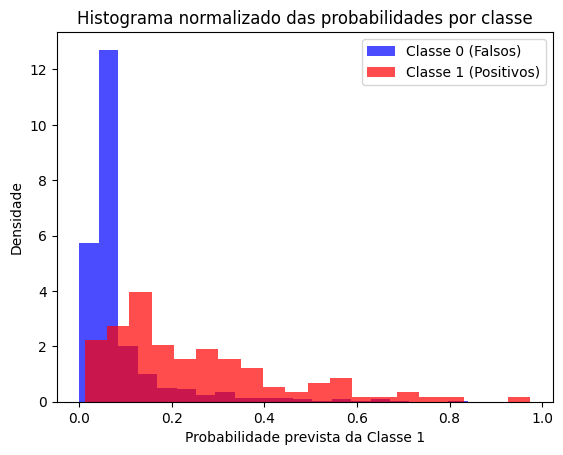

In [121]:
previsao = LR.predict(X_train)
Y_probas = LR.predict_proba(X_train)


eficiencia= recall_score(Y_train,previsao,pos_label=1)
print(f"Eficiência = {eficiencia:.5f}")
print ()
pureza = precision_score(Y_train, previsao, pos_label=1)
print(f"Pureza = {pureza:.5f}")

# Probabilidades previstas da classe 1
y_proba = LR.predict_proba(X_test)[:, 1]

# Plota histogramas normalizados (densidade)
plt.hist(y_proba[Y_test.ravel() == 0], bins=20, alpha=0.7, color="blue", label="Classe 0 (Falsos)", density=True)

plt.hist(y_proba[Y_test.ravel() == 1], bins=20, alpha=0.7, color="red", label="Classe 1 (Positivos)", density=True)

plt.xlabel("Probabilidade prevista da Classe 1")
plt.ylabel("Densidade")
plt.title("Histograma normalizado das probabilidades por classe")
plt.legend()
plt.show()

Para os dados de test
Eficiência = 0.13223

Pureza = 0.53333


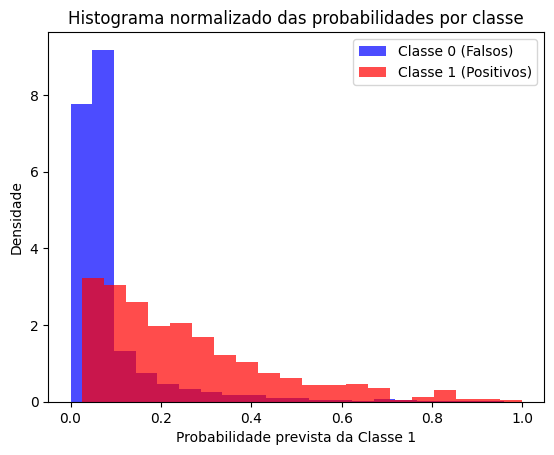

In [110]:
previsao = LR.predict(X_test)

eficiencia = recall_score(Y_test,previsao,pos_label=1)
pureza = precision_score(Y_test, previsao, pos_label=1)
print ("Para os dados de test")
print(f"Eficiência = {eficiencia:.5f}")
print ()
print(f"Pureza = {pureza:.5f}")

import matplotlib.pyplot as plt

# Probabilidades previstas da classe 1
y_proba = LR.predict_proba(X_train)[:, 1]

# Plota histogramas normalizados (densidade)
plt.hist(y_proba[Y_train.ravel() == 0], bins=20, alpha=0.7, color="blue", label="Classe 0 (Falsos)", density=True)

plt.hist(y_proba[Y_train.ravel() == 1], bins=20, alpha=0.7, color="red", label="Classe 1 (Positivos)", density=True)

plt.xlabel("Probabilidade prevista da Classe 1")
plt.ylabel("Densidade")
plt.title("Histograma normalizado das probabilidades por classe")
plt.legend()
plt.show()

Threshold 0.00 -> Eficiência: 1.00000, Pureza: 0.09813
Threshold 0.02 -> Eficiência: 0.99174, Pureza: 0.09804
Threshold 0.04 -> Eficiência: 0.98347, Pureza: 0.11070
Threshold 0.06 -> Eficiência: 0.92562, Pureza: 0.15708
Threshold 0.07 -> Eficiência: 0.87603, Pureza: 0.24709
Threshold 0.09 -> Eficiência: 0.83471, Pureza: 0.31173
Threshold 0.11 -> Eficiência: 0.74380, Pureza: 0.33962
Threshold 0.13 -> Eficiência: 0.66942, Pureza: 0.34914
Threshold 0.15 -> Eficiência: 0.58678, Pureza: 0.35859
Threshold 0.17 -> Eficiência: 0.56198, Pureza: 0.37778
Threshold 0.18 -> Eficiência: 0.50413, Pureza: 0.39103
Threshold 0.20 -> Eficiência: 0.47934, Pureza: 0.39456
Threshold 0.22 -> Eficiência: 0.42975, Pureza: 0.38235
Threshold 0.24 -> Eficiência: 0.40496, Pureza: 0.40833
Threshold 0.26 -> Eficiência: 0.38843, Pureza: 0.41593
Threshold 0.28 -> Eficiência: 0.36364, Pureza: 0.43137
Threshold 0.29 -> Eficiência: 0.33058, Pureza: 0.42553
Threshold 0.31 -> Eficiência: 0.27273, Pureza: 0.42857
Threshold 

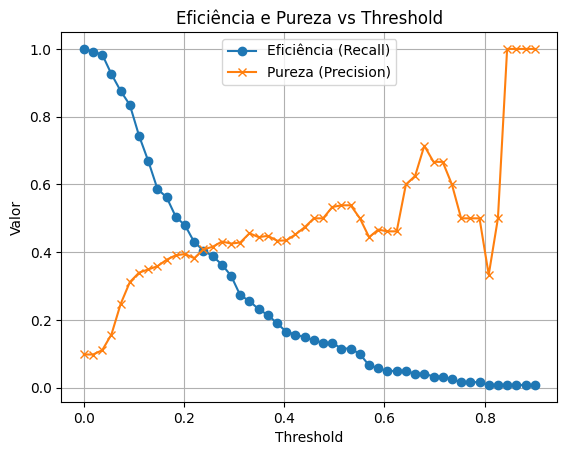

In [112]:
y_proba = LR.predict_proba(X_test)[:, 1]

# Testando thresholds de 0 a 1
thresholds = np.linspace(0, 0.9, 50)  
eficiencia_list = []
pureza_list = []

for t in thresholds:
    y_pred_custom = (y_proba >= t).astype(int)  
    eficiencia_list.append(recall_score(Y_test, y_pred_custom, pos_label=1))
    pureza_list.append(precision_score(Y_test, y_pred_custom, pos_label=1))


for t, r, p in zip(thresholds, eficiencia_list, pureza_list):
    print(f"Threshold {t:.2f} -> Eficiência: {r:.5f}, Pureza: {p:.5f}")

# Plotar curvas
plt.plot(thresholds, eficiencia_list, label="Eficiência (Recall)", marker='o')
plt.plot(thresholds, pureza_list, label="Pureza (Precision)", marker='x')
plt.xlabel("Threshold")
plt.ylabel("Valor")
plt.title("Eficiência e Pureza vs Threshold")
plt.legend()
plt.grid(True)
plt.show()

Para os dados de treino
Eficiência = 0.13527

Pureza = 0.44917


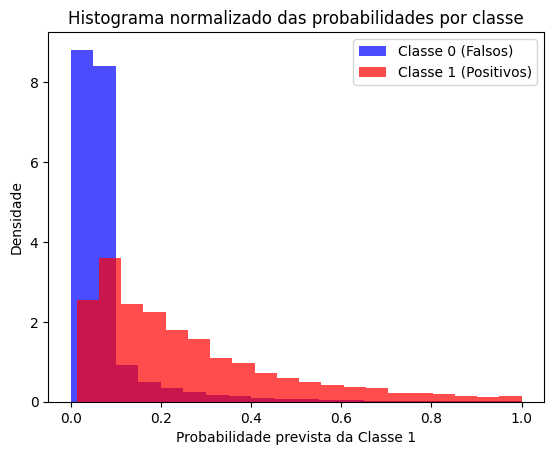

Threshold 0.00 -> Eficiência: 1.00000, Pureza: 0.07671
Threshold 0.02 -> Eficiência: 0.99944, Pureza: 0.07698
Threshold 0.04 -> Eficiência: 0.97562, Pureza: 0.08895
Threshold 0.06 -> Eficiência: 0.91015, Pureza: 0.14040
Threshold 0.07 -> Eficiência: 0.82276, Pureza: 0.22883
Threshold 0.09 -> Eficiência: 0.75484, Pureza: 0.29007
Threshold 0.11 -> Eficiência: 0.70029, Pureza: 0.31981
Threshold 0.13 -> Eficiência: 0.64930, Pureza: 0.33620
Threshold 0.15 -> Eficiência: 0.60588, Pureza: 0.34880
Threshold 0.17 -> Eficiência: 0.56780, Pureza: 0.36137
Threshold 0.18 -> Eficiência: 0.52082, Pureza: 0.36829
Threshold 0.20 -> Eficiência: 0.48163, Pureza: 0.37503
Threshold 0.22 -> Eficiência: 0.44467, Pureza: 0.38282
Threshold 0.24 -> Eficiência: 0.41093, Pureza: 0.38898
Threshold 0.26 -> Eficiência: 0.37965, Pureza: 0.39541
Threshold 0.28 -> Eficiência: 0.35081, Pureza: 0.40171
Threshold 0.29 -> Eficiência: 0.32209, Pureza: 0.40366
Threshold 0.31 -> Eficiência: 0.29426, Pureza: 0.40456
Threshold 

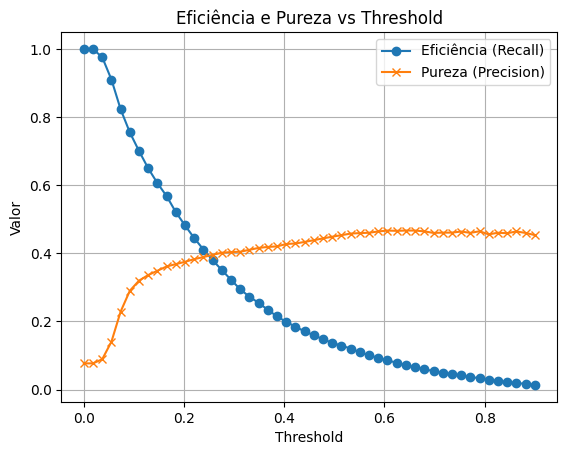

In [104]:
dados = pd.read_csv("CCBBBar_Tagging.csv")


dados["ln_SigmaKT"] = np.log(dados["SigmaKT"] + 1e-6) 
X = np.asarray(dados[["PtJet","nConstituent","ln_SigmaKT","N_Vertices_S","FracLeadPt"]])
Y = np.asarray(dados[["Label"]])

# Trabalhando com cortes do PT 
previsao = LR.predict(X)
eficiencia = recall_score(Y,previsao,pos_label=1)
pureza = precision_score(Y, previsao, pos_label=1)
print ("Para os dados de treino")
print(f"Eficiência = {eficiencia:.5f}")
print ()
print(f"Pureza = {pureza:.5f}")

import matplotlib.pyplot as plt

# Probabilidades previstas da classe 1
y_proba = LR.predict_proba(X)[:, 1]

# Plota histogramas normalizados (densidade)
plt.hist(y_proba[Y.ravel() == 0], bins=20, alpha=0.7, color="blue", label="Classe 0 (Falsos)", density=True)

plt.hist(y_proba[Y.ravel() == 1], bins=20, alpha=0.7, color="red", label="Classe 1 (Positivos)", density=True)

plt.xlabel("Probabilidade prevista da Classe 1")
plt.ylabel("Densidade")
plt.title("Histograma normalizado das probabilidades por classe")
plt.legend()
plt.show()

y_proba = LR.predict_proba(X)[:, 1]

# Testando thresholds de 0 a 1
thresholds = np.linspace(0, 0.9, 50)  
eficiencia_list = []
pureza_list = []

for t in thresholds:
    y_pred_custom = (y_proba >= t).astype(int)  
    eficiencia_list.append(recall_score(Y, y_pred_custom, pos_label=1))
    pureza_list.append(precision_score(Y, y_pred_custom, pos_label=1))


for t, r, p in zip(thresholds, eficiencia_list, pureza_list):
    print(f"Threshold {t:.2f} -> Eficiência: {r:.5f}, Pureza: {p:.5f}")

# Plotar curvas
plt.plot(thresholds, eficiencia_list, label="Eficiência (Recall)", marker='o')
plt.plot(thresholds, pureza_list, label="Pureza (Precision)", marker='x')
plt.xlabel("Threshold")
plt.ylabel("Valor")
plt.title("Eficiência e Pureza vs Threshold")
plt.legend()
plt.grid(True)
plt.show()


In [65]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

def plot_ROC(falsePositiveRate, truePositiveRate, areaUnderCurve):
    fig = plt.figure()
    fig.set_size_inches(15, 5)
    rocCurve = fig.add_subplot(1, 2, 1)

    # curva ROC
    rocCurve.plot(falsePositiveRate, truePositiveRate, color='darkgreen',
                  lw=2, label='ROC curve (area = %0.2f)' % areaUnderCurve)
    
    # linha aleatória
    rocCurve.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    
    # grade, limites e ticks
    rocCurve.grid()
    plt.xlim([0.0, 1.0])
    rocCurve.set_xticks(np.arange(0, 1.1, 0.1))
    plt.ylim([0.0, 1.05])
    rocCurve.set_yticks(np.arange(0, 1.05, 0.1))
    
    # rótulos
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    rocCurve.legend(loc="lower right")
    
    for i in range(0, len(thresholds), max(1, len(thresholds)//10)):
        plt.annotate(f"{thresholds[i]:.2f}",
                     (fpr[i], tpr[i]),
                     textcoords="offset points", xytext=(10, -5),
                     fontsize=8, color="red",
                     arrowprops=dict(arrowstyle="->", lw=0.5))
    
    return plt

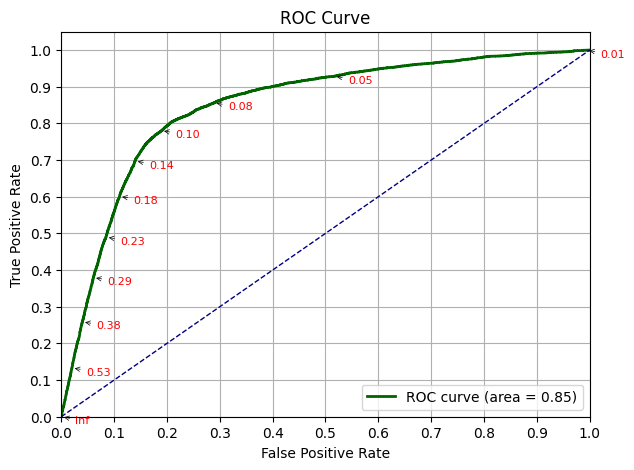

In [66]:
# calcular fpr, tpr e auc
fpr, tpr, thresholds = metrics.roc_curve(Y_train, Y_probas[:, 1])
auc = metrics.auc(fpr, tpr)

# chamar a função e mostrar o gráfico
plot_ROC(fpr, tpr, auc)
plt.show()

In [76]:
from sklearn.metrics import confusion_matrix, classification_report

# probabilidade da classe positiva
Y_probas = LR.predict_proba(X_test)[:, 1]

# escolher threshold
threshold = 0.8
previsao_custom = (Y_probas >= threshold).astype(int)
#FP/(FP + TN)
# avaliar
print("Threshold escolhido:", threshold)
print("Matriz de confusão:")
print(confusion_matrix(Y_test, previsao_custom))
print("\nRelatório de classificação:")
print(classification_report(Y_test, previsao_custom))

Threshold escolhido: 0.8
Matriz de confusão:
[[11151    38]
 [ 1377    38]]

Relatório de classificação:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     11189
           1       0.50      0.03      0.05      1415

    accuracy                           0.89     12604
   macro avg       0.70      0.51      0.50     12604
weighted avg       0.85      0.89      0.84     12604



In [18]:
logreg = LogisticRegression(random_state=42)


pureza = make_scorer(precision_score, pos_label=1, zero_division=0)


cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],           # regularização inversa                # tipo de regularização
    'solver': ['liblinear', 'saga', 'lbfgs', 'newton-cg', 'sag']       # algoritmos que suportam L1/L2            # número máximo de iterações
}

# --- GridSearchCV ---
gs = GridSearchCV(
    estimator=logreg,
    param_grid=param_grid,
    scoring=pureza,
    cv=cv,
    n_jobs=-1
)

# --- Treinar ---
gs.fit(X_train, Y_train.ravel())

# --- Resultados ---
print("Melhores parâmetros:", gs.best_params_)
print("Melhor pureza (precision classe 1):", gs.best_score_)

/home/vinicius/Ambientes/Heavy_Jets_Machine/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vinicius/Ambientes/Heavy_Jets_Machine/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vinicius/Ambientes/Heavy_Jets_Machine/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vinicius/Ambientes/Heavy_Jets_Machine/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vinicius/Ambientes/Heavy_Jets_Machine/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the 

Melhores parâmetros: {'C': 0.01, 'solver': 'liblinear'}
Melhor pureza (precision classe 1): 0.4644903948684597
